# WeatherPy

---

## Starter Code to Generate Random Geographic Coordinates and a List of Cities

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress

# Impor the OpenWeatherMap API key
from api_keys import weather_api_key

# Import citipy to determine the cities based on latitude and longitude
from citipy import citipy

### Generate the Cities List by Using the `citipy` Library

In [2]:
# Empty list for holding the latitude and longitude combinations
lat_lngs = []

# Empty list for holding the cities names
cities = []

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print(f"Number of cities in the list: {len(cities)}")

Number of cities in the list: 617


---

## Requirement 1: Create Plots to Showcase the Relationship Between Weather Variables and Latitude

### Use the OpenWeatherMap API to retrieve weather data from the cities list generated in the started code

In [3]:
# Set the API base URL
url = f"http://api.openweathermap.org/data/2.5/weather?appid={weather_api_key}&q="

# Define an empty list to fetch the weather data for each city
city_data = []

# Print to logger
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters
record_count = 1
set_count = 1

# Loop through all the cities in our list to fetch weather data
for i, city in enumerate(cities):
        
    # Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 0

    # Create endpoint URL with each city
    city_url = url + city
    
    # Log the url, record, and set numbers
    print("Processing Record %s of Set %s | %s" % (record_count, set_count, city))

    # Add 1 to the record count
    record_count += 1

    # Run an API request for each of the cities
    try:
        # Parse the JSON and retrieve data
        city_weather = requests.get(city_url).json()

        # Parse out latitude, longitude, max temp, humidity, cloudiness, wind speed, country, and date
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        city_date = city_weather["dt"]

        # Append the City information into city_data list
        city_data.append({"City": city, 
                          "Lat": city_lat, 
                          "Lng": city_lng, 
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

    # If an error is experienced, skip the city
    except:
        print("City not found. Skipping...")
        pass
              
# Indicate that Data Loading is complete 
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | waitangi
Processing Record 2 of Set 1 | puerto natales
Processing Record 3 of Set 1 | guerrero negro
Processing Record 4 of Set 1 | grytviken
Processing Record 5 of Set 1 | kot samaba
Processing Record 6 of Set 1 | celestun
Processing Record 7 of Set 1 | west island
Processing Record 8 of Set 1 | kayangel
Processing Record 9 of Set 1 | happy valley-goose bay
Processing Record 10 of Set 1 | puerto baquerizo moreno
Processing Record 11 of Set 1 | ulsteinvik
Processing Record 12 of Set 1 | ilulissat
Processing Record 13 of Set 1 | kirillov
Processing Record 14 of Set 1 | vorgashor
Processing Record 15 of Set 1 | blackmans bay
Processing Record 16 of Set 1 | aykhal
Processing Record 17 of Set 1 | sitka
Processing Record 18 of Set 1 | mbuji-mayi
Processing Record 19 of Set 1 | lebu
Processing Record 20 of Set 1 | elverum
Processing Record 21 of Set 1 | brookings
Processing Record 22 of Set 1 | ushuaia

City not found. Skipping...
Processing Record 42 of Set 4 | isafjordur
Processing Record 43 of Set 4 | kramfors
Processing Record 44 of Set 4 | brezina
Processing Record 45 of Set 4 | hammerfest
Processing Record 46 of Set 4 | salekhard
Processing Record 47 of Set 4 | jeju city
Processing Record 48 of Set 4 | leninskoye
Processing Record 49 of Set 4 | santa lucia cotzumalguapa
Processing Record 0 of Set 5 | port douglas
Processing Record 1 of Set 5 | hayma'
City not found. Skipping...
Processing Record 2 of Set 5 | monki
Processing Record 3 of Set 5 | fort st. john
Processing Record 4 of Set 5 | ulenje
Processing Record 5 of Set 5 | howard springs
Processing Record 6 of Set 5 | dera bugti
Processing Record 7 of Set 5 | saint-pierre
Processing Record 8 of Set 5 | nuku'alofa
Processing Record 9 of Set 5 | xinmin
Processing Record 10 of Set 5 | antsiranana
Processing Record 11 of Set 5 | gowurdak
Processing Record 12 of Set 5 | axim
Processing Record 13 of Set 5 | sferracavallo
Processing

Processing Record 32 of Set 8 | kyren
Processing Record 33 of Set 8 | grand baie
Processing Record 34 of Set 8 | vanimo
Processing Record 35 of Set 8 | puerto aysen
Processing Record 36 of Set 8 | olinda
Processing Record 37 of Set 8 | akureyri
Processing Record 38 of Set 8 | nuuk
Processing Record 39 of Set 8 | brisas de zicatela
Processing Record 40 of Set 8 | togur
Processing Record 41 of Set 8 | nizhniy ingash
Processing Record 42 of Set 8 | arafat
Processing Record 43 of Set 8 | acarau
Processing Record 44 of Set 8 | gadzhiyevo
Processing Record 45 of Set 8 | chato
Processing Record 46 of Set 8 | douentza
Processing Record 47 of Set 8 | raducaneni
Processing Record 48 of Set 8 | santa barbara d'oeste
Processing Record 49 of Set 8 | floro
Processing Record 0 of Set 9 | fort william
Processing Record 1 of Set 9 | siquijor
Processing Record 2 of Set 9 | tadine
Processing Record 3 of Set 9 | ust'-ilimsk
Processing Record 4 of Set 9 | pacific grove
Processing Record 5 of Set 9 | anadyr

Processing Record 20 of Set 12 | korsakov
Processing Record 21 of Set 12 | port saint john's
Processing Record 22 of Set 12 | bodo
Processing Record 23 of Set 12 | nagqu
Processing Record 24 of Set 12 | luorong
Processing Record 25 of Set 12 | marsaskala
City not found. Skipping...
Processing Record 26 of Set 12 | arys
Processing Record 27 of Set 12 | kavieng
Processing Record 28 of Set 12 | ammi moussa
Processing Record 29 of Set 12 | borisoglebsk
Processing Record 30 of Set 12 | yaren
Processing Record 31 of Set 12 | ichinoseki
Processing Record 32 of Set 12 | oranjestad
Processing Record 33 of Set 12 | zarand
Processing Record 34 of Set 12 | heihe
Processing Record 35 of Set 12 | al hazm
Processing Record 36 of Set 12 | los llanos de aridane
Processing Record 37 of Set 12 | toga village
City not found. Skipping...
Processing Record 38 of Set 12 | guelendeng
Processing Record 39 of Set 12 | lompoc
Processing Record 40 of Set 12 | kailua-kona
Processing Record 41 of Set 12 | alpine
Pr

In [4]:
# Convert the cities weather data into a Pandas DataFrame
city_data_df = pd.DataFrame(city_data)

# Show Record Count
city_data_df.count()

City          594
Lat           594
Lng           594
Max Temp      594
Humidity      594
Cloudiness    594
Wind Speed    594
Country       594
Date          594
dtype: int64

In [5]:
# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,waitangi,-43.9535,-176.5597,290.27,88,95,0.45,NZ,1707072492
1,puerto natales,-51.7236,-72.4875,298.40,38,75,15.95,CL,1707072450
2,guerrero negro,27.9769,-114.0611,291.46,50,0,2.60,MX,1707072492
3,grytviken,-54.2811,-36.5092,277.19,70,18,6.50,GS,1707072492
4,kot samaba,28.5522,70.4684,288.07,49,0,2.60,PK,1707072493


In [6]:
# Export the City_Data into a csv
city_data_df.to_csv("output_data/cities.csv", index_label="City_ID")

In [7]:
# Read saved data
city_data_df = pd.read_csv("output_data/cities.csv", index_col="City_ID")

# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,waitangi,-43.9535,-176.5597,290.27,88,95,0.45,NZ,1707072492
1,puerto natales,-51.7236,-72.4875,298.40,38,75,15.95,CL,1707072450
2,guerrero negro,27.9769,-114.0611,291.46,50,0,2.60,MX,1707072492
3,grytviken,-54.2811,-36.5092,277.19,70,18,6.50,GS,1707072492
4,kot samaba,28.5522,70.4684,288.07,49,0,2.60,PK,1707072493


### Create the Scatter Plots Requested

#### Latitude Vs. Temperature

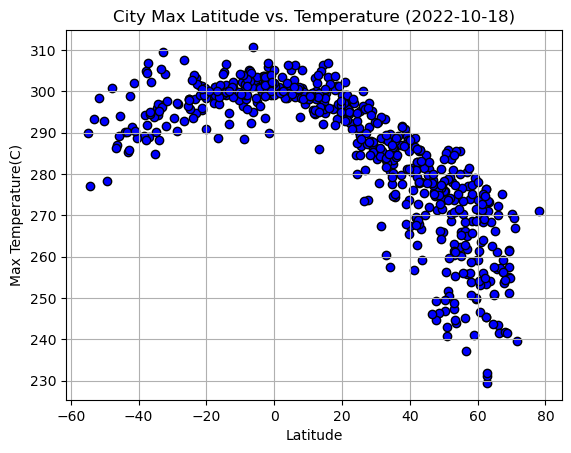

In [8]:
# Build scatter plot for latitude vs. temperature
plt.scatter(city_data_df["Lat"], city_data_df["Max Temp"], marker="o", facecolors="blue", edgecolors="black")

# Incorporate the other graph properties
plt.title("City Max Latitude vs. Temperature (2022-10-18)")
plt.xlabel("Latitude")
plt.ylabel("Max Temperature(C)")
plt.grid()

# Save the figure
plt.savefig("output_data/Fig1.png")

# Show plot
plt.show()

#### Latitude Vs. Humidity

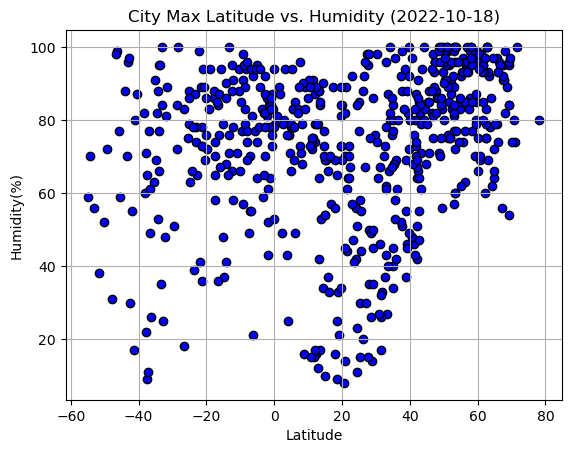

In [9]:
# Build the scatter plots for latitude vs. humidity
plt.scatter(city_data_df["Lat"], city_data_df["Humidity"], marker="o", facecolors="blue", edgecolors="black")

# Incorporate the other graph properties
plt.title("City Max Latitude vs. Humidity (2022-10-18)")
plt.xlabel("Latitude")
plt.ylabel("Humidity(%)")
plt.grid()

# Save the figure
plt.savefig("output_data/Fig2.png")

# Show plot
plt.show()

#### Latitude Vs. Cloudiness

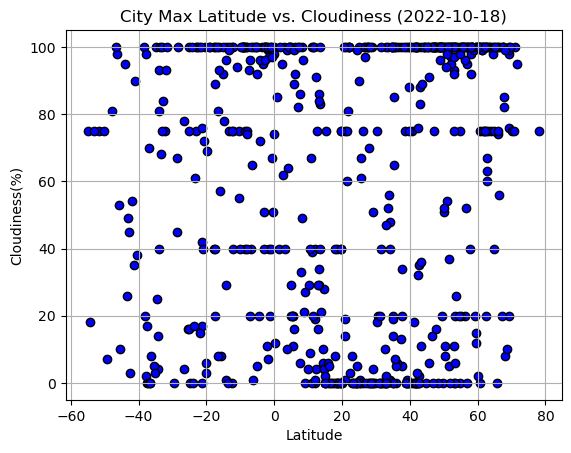

In [10]:
# Build the scatter plots for latitude vs. cloudiness
plt.scatter(city_data_df["Lat"], city_data_df["Cloudiness"], marker="o", facecolors="blue", edgecolors="black")

# Incorporate the other graph properties
plt.title("City Max Latitude vs. Cloudiness (2022-10-18)")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness(%)")
plt.grid()

# Save the figure
plt.savefig("output_data/Fig3.png")

# Show plot
plt.show()

#### Latitude vs. Wind Speed Plot

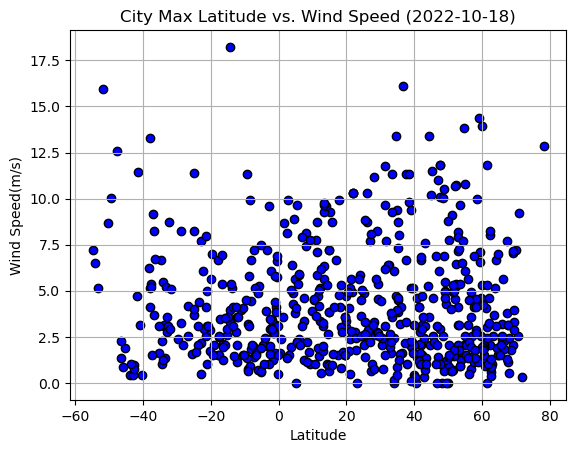

In [11]:
# Build the scatter plots for latitude vs. wind speed
plt.scatter(city_data_df["Lat"], city_data_df["Wind Speed"], marker="o", facecolors="blue", edgecolors="black")

# Incorporate the other graph properties
plt.title("City Max Latitude vs. Wind Speed (2022-10-18)")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed(m/s)")
plt.grid()

# Save the figure
plt.savefig("output_data/Fig4.png")

# Show plot
plt.show()

---

## Requirement 2: Compute Linear Regression for Each Relationship


In [27]:
# Define a function to create Linear Regression plots
# (slope, intercept, rvalue, pvalue, stderr) = linregress (x_values, y_values)

def linregress_plot (x_values, y_values, title="", xlabel="", ylabel=""):
    #perform linear regression
    (slope, intercept, rvalue, pvalue, stderr) = linregress (x_values, y_values)
    #create scatter plot
    plt.scatter(x_values, y_values, marker="o", facecolors="blue", edgecolors="black")
    #plot the regression line
    regression_line = slope * x_values + intercept
    plt.plot(x_values, regression_line, label="Linear Regression Line", color="red")
    
    plt.title(title)
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    
    plt.show()
    


In [13]:
# Create a DataFrame with the Northern Hemisphere data (Latitude >= 0)
northern_hemi_df = city_data_df[(city_data_df["Lat"] >= 0)]

# Display sample data
northern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
2,guerrero negro,27.9769,-114.0611,291.46,50,0,2.60,MX,1707072492
4,kot samaba,28.5522,70.4684,288.07,49,0,2.60,PK,1707072493
5,celestun,20.8667,-90.4000,299.07,70,14,4.09,MX,1707072493
7,kayangel,8.0823,134.7173,300.80,79,100,8.11,PW,1707072493
8,happy valley-goose bay,53.3168,-60.3315,255.32,60,20,1.54,CA,1707072310


In [14]:
# Create a DataFrame with the Southern Hemisphere data (Latitude < 0)
southern_hemi_df = city_data_df[(city_data_df["Lat"] < 0)]

# Display sample data
southern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,waitangi,-43.9535,-176.5597,290.27,88,95,0.45,NZ,1707072492
1,puerto natales,-51.7236,-72.4875,298.40,38,75,15.95,CL,1707072450
3,grytviken,-54.2811,-36.5092,277.19,70,18,6.50,GS,1707072492
6,west island,-12.1568,96.8225,301.14,78,75,3.60,CC,1707072493
9,puerto baquerizo moreno,-0.9000,-89.6000,300.70,83,100,4.12,EC,1707072494


###  Temperature vs. Latitude Linear Regression Plot

The r-value is: 0.7161472181434118


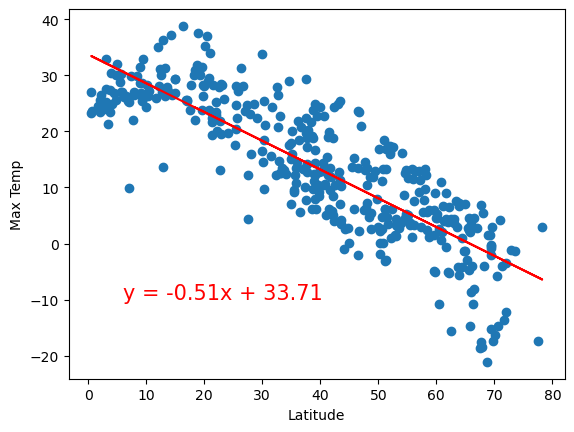

In [15]:
#ORIGINAL Linear regression on Northern Hemisphere
# YOUR CODE HERE

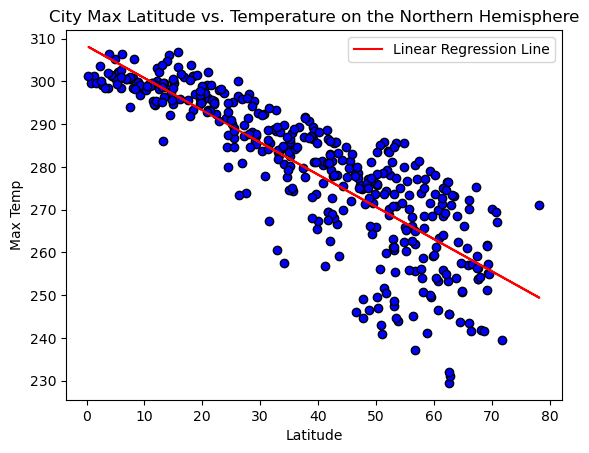

In [28]:
# Linear regression on Northern Hemisphere
linregress_plot (northern_hemi_df["Lat"], northern_hemi_df["Max Temp"], title="City Max Latitude vs. Temperature on the Northern Hemisphere", xlabel="Latitude", ylabel="Max Temp")

The r-value is: 0.4121057168607245


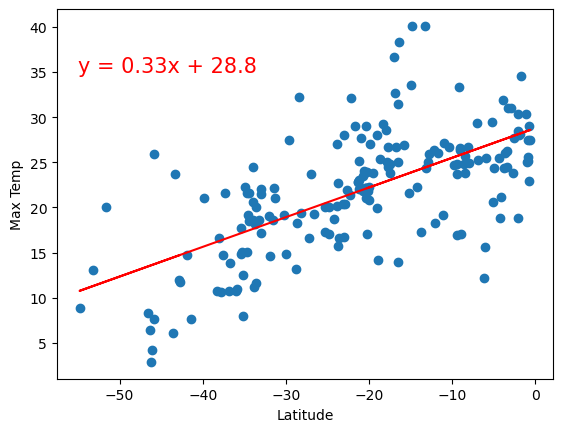

In [16]:
# Linear regression on Southern Hemisphere
# YOUR CODE HERE

**Discussion about the linear relationship:** YOUR RESPONSE HERE

### Humidity vs. Latitude Linear Regression Plot

The r-value is: 0.05689741545789598


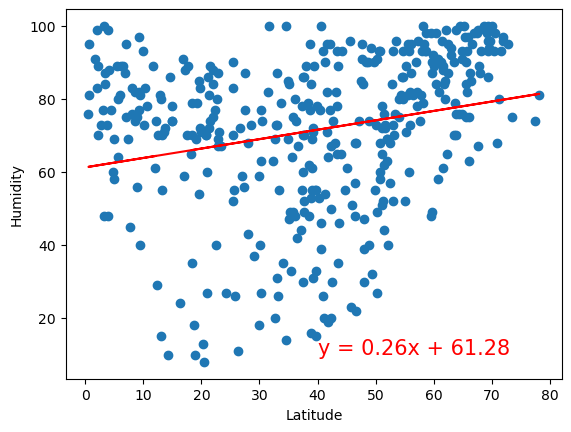

In [17]:
# Northern Hemisphere
# YOUR CODE HERE

The r-value is: 0.0002808747046324607


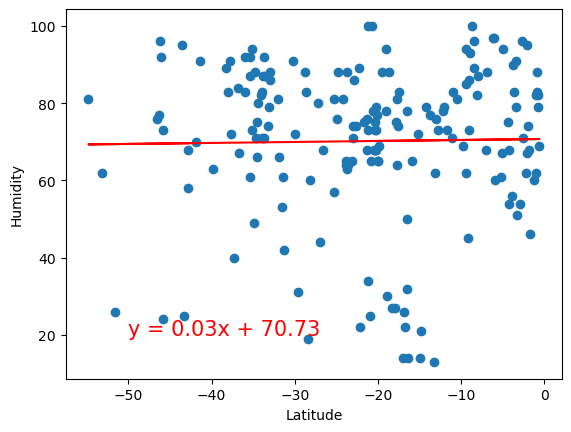

In [18]:
# Southern Hemisphere
# YOUR CODE HERE

**Discussion about the linear relationship:** YOUR RESPONSE HERE

### Cloudiness vs. Latitude Linear Regression Plot

The r-value is: 0.024026517125811015


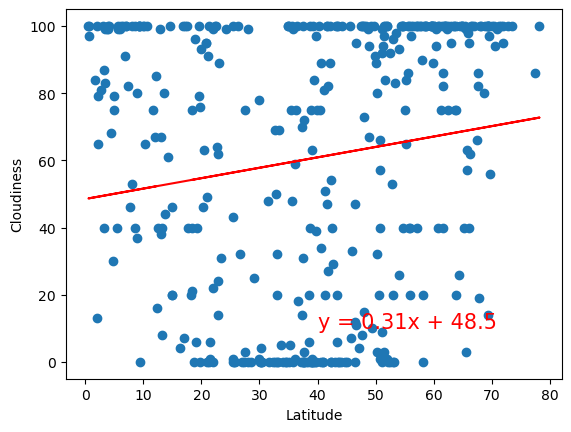

In [19]:
# Northern Hemisphere
# YOUR CODE HERE

The r-value is: 0.02056735429994368


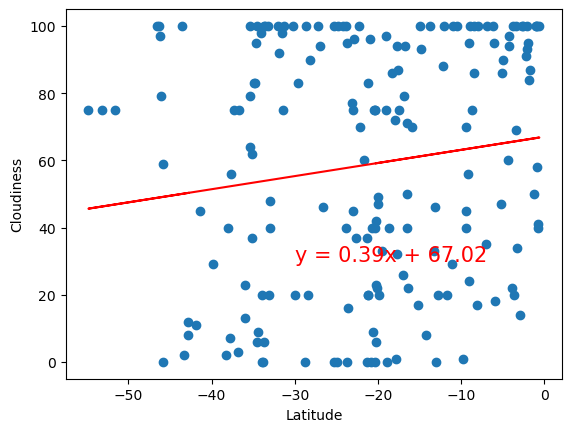

In [20]:
# Southern Hemisphere
# YOUR CODE HERE

**Discussion about the linear relationship:** YOUR RESPONSE HERE

### Wind Speed vs. Latitude Linear Regression Plot

The r-value is: 0.030396762354449467


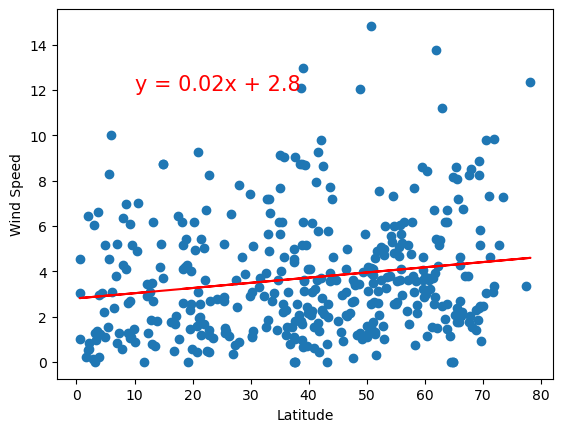

In [21]:
# Northern Hemisphere
# YOUR CODE HERE

The r-value is: 0.062239040700515696


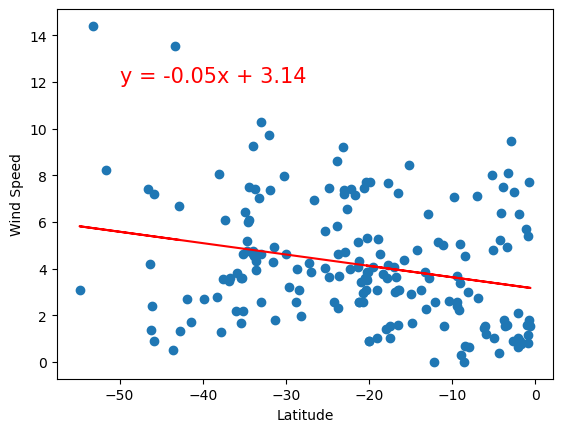

In [22]:
# Southern Hemisphere
# YOUR CODE HERE

**Discussion about the linear relationship:** YOUR RESPONSE HERE